In [1]:
import itertools
import random

import axelrod as axl
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import skopt
import tqdm
from skopt.plots import plot_convergence

In [2]:
import opt_mo

In [3]:
font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)


In [34]:
def bayesian(opponents, n_calls=60):
    method_params = {"n_random_starts": 20, "n_calls": n_calls}
    bounds = [(0, 0.9999) for _ in range(4)]
    objective = opt_mo.memory_one_best_response.prepare_objective_optimisation(
        opponents=opponents
    )

    result = skopt.gp_minimize(
        func=objective,
        dimensions=bounds,
        acq_func="EI",
        random_state=0,
        **method_params
    )

    return result


**example seed $\in 2$** explains the covergence function/check.

In [5]:
axl.seed(2)
random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]
best_response = opt_mo.get_memory_one_best_response(random_opponents)


In [35]:
opponents = [[1/3, 1/3, 1/3, 1/3], [1, 0, 0, 1]]
res = bayesian(opponents)

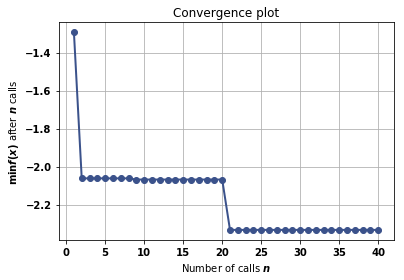

In [9]:
plot_convergence(res);

In [36]:
values = np.minimum.accumulate(res.func_vals, 0)


In [37]:
values = [-x for x in values]

In [38]:
color = matplotlib.cm.viridis(0.3)

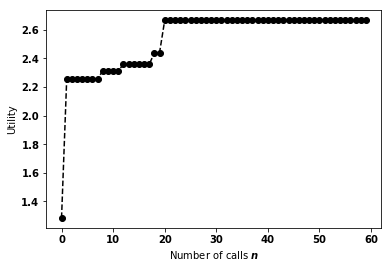

In [41]:
fig, ax = plt.subplots()

plt.plot(range(len(values)), values, "--o", color='black')
#plt.title("Bayesian Optimisation",)
plt.xlabel("Number of calls $n$",)
plt.ylabel(r"Utility");

# ax.tick_params(axis="x", colors=color)
# ax.tick_params(axis="y", colors=color)

# ax.spines["bottom"].set_color(color)
# ax.spines["top"].set_color(color)
# ax.spines["right"].set_color(color)
# ax.spines["left"].set_color(color)

# fig.savefig(
#     "/home/nightwing/rsc/STEM-BRITAIN-2019/poster/img/bayesian.pdf",
#     bbox_inches="tight",
#     facecolor=fig.get_facecolor(),
#     transparent=True,
# )

fig.savefig('../img/bayesian_example.pdf')

**Evolutionary case** for **Memory One strategies**

It's known that before including the cycle check in the history, for seed $\in [2]$ there was a cycle. 

In [8]:
random_opponents


[[0.8444218515250481,
  0.7579544029403025,
  0.420571580830845,
  0.25891675029296335],
 [0.5112747213686085,
  0.4049341374504143,
  0.7837985890347726,
  0.30331272607892745]]

In [9]:
best_response = opt_mo.get_memory_one_best_response(random_opponents)


In [10]:
best_response


array([0.        , 0.        , 0.        , 0.99999999])

In [11]:
best_ev_response


array([0.99999999, 0.83890163, 0.        , 0.        ])

In [5]:
best_resposnses, mem_one_histories = [], []
for seed in [0]:
    axl.seed(seed)
    random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]

    best_ev_response, hist, lenght = opt_mo.get_evolutionary_best_response(
        random_opponents, opt_mo.get_memory_one_best_response
    )
    best_resposnses.append(best_ev_response), mem_one_histories.append(hist)
    print("------------------")


/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
------------------


In [6]:
bg_color = "#002B36"
color = "#FDF6E3"


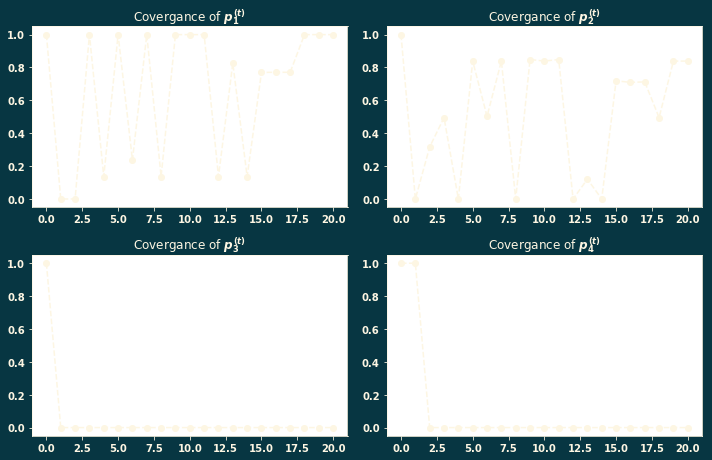

In [7]:
for hist in mem_one_histories:
    points = [[history[i] for history in hist] for i in range(4)]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5), facecolor="#073642")
    for i in range(4):
        axes = (int(i / 2), i % 2)
        ax[axes].plot(points[i], linestyle="--", marker="o", color=color),
        ax[axes].set_title(r"Covergance of $p^{(t)}_%s$" % (i + 1), color=color)
        ax[axes].set_ylim(-0.05, 1.05)

        ax[axes].tick_params(axis="x", colors=color)
        ax[axes].tick_params(axis="y", colors=color)

        ax[axes].spines["bottom"].set_color(color)
        ax[axes].spines["top"].set_color(color)
        ax[axes].spines["right"].set_color(color)
        ax[axes].spines["left"].set_color(color)
    fig.tight_layout()

    fig.savefig(
        "/home/nightwing/rsc/STEM-BRITAIN-2019/poster/img/evolutionary_results.pdf",
        bbox_inches="tight",
        facecolor=fig.get_facecolor(),
        transparent=True,
    )


In [11]:
for j, hist in enumerate(mem_one_histories):
    points = [[history[i] for history in hist] for i in range(4)]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))
    for i in range(4):
        axes = (int(i / 2), i % 2)
        ax[axes].plot(points[i], linestyle="--", marker="o", color="black"),
        ax[axes].set_title(r"$p_{}$".format(i + 1))
        ax[axes].set_ylim(-0.05, 1.05)
    fig.tight_layout()

    fig.savefig("../img/evol{}.pdf".format(j), bbox_inches="tight")


**Reactive case**

In [4]:
reactive_best_resposnses, reactive_histories = [], []
for seed in range(9, 20):
    axl.seed(seed)
    random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]

    best_ev_response, hist, lenght = opt_mo.get_evolutionary_best_response(
        random_opponents, opt_mo.get_reactive_best_response_with_bayesian
    )
    reactive_best_resposnses.append(best_ev_response), reactive_histories.append(hist)
    print("------------------")


Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
------------------
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
------------------
Next generation.
------------------
Next generation.
Next generation.
------------------
Next generation.
------------------
Next generation.
------------------
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
------------------
Next generation.
------------------
Next generation.
Next generation.
Next generation.
Next generation.
Next generation.
------------------
Next generation.
------------------
Next generation.
------------------


In [5]:
histories = [hist for hist in reactive_histories if len(hist) > 3]


In [6]:
len(histories)


5

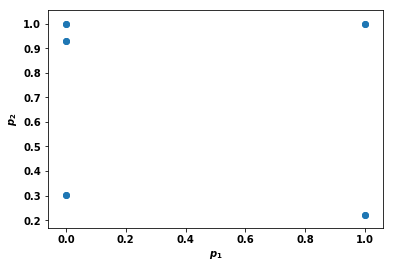

In [18]:
points = [res[:2] for res in histories[3]]
x = list(zip(*points))[0]
y = list(zip(*points))[1]

fig = plt.subplot()
plt.scatter(x, y)

plt.ylabel("$p_2$")
plt.xlabel("$p_1$")


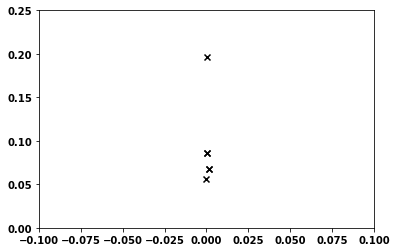

In [54]:
points = [res[:2] for res in reactive_histories[0][1:]]
x = list(zip(*points))[0]
y = list(zip(*points))[1]

fig = plt.subplot()
plt.scatter(x, y, marker="x", color="black")

plt.ylim((0, 0.25))
plt.xlim((-0.1, 0.1))


**Now lets draw the cycle**

For memory one strategies.

In [12]:
axl.seed(2)
random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]


In [13]:
over_all_hist = []
initial = np.array([1, 1, 1, 1])
for _ in range(3):
    best_ev_response, hist = opt_mo.get_evolutionary_best_response(
        random_opponents, opt_mo.get_memory_one_best_response, initial=initial
    )
    initial = best_ev_response
    over_all_hist.append(hist)


Next generation.
Next generation.


In [14]:
hist = [item for sublist in over_all_hist for item in sublist]


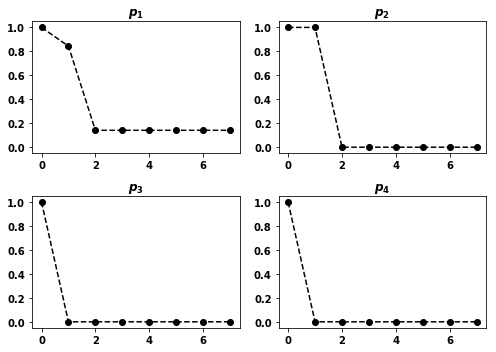

In [15]:
points = [[history[i] for history in hist] for i in range(4)]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))
for i in range(4):
    axes = (int(i / 2), i % 2)
    ax[axes].plot(points[i], linestyle="--", marker="o", color="black"),
    ax[axes].set_title(r"$p_{}$".format(i + 1))
    ax[axes].set_ylim(-0.05, 1.05)
fig.tight_layout()


**With different intilias**

In [5]:
best_responses_initial, mem_one_histories_initial = [], []
for seed in [2, 4]:
    axl.seed(seed)
    random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]

    initial = opt_mo.get_memory_one_best_response(random_opponents)

    best_ev_response, hist = opt_mo.get_evolutionary_best_response(
        random_opponents, opt_mo.get_memory_one_best_response, initial=initial
    )
    best_responses_initial.append(best_ev_response), mem_one_histories_initial.append(
        hist
    )
    print("------------------")


Next generation.
------------------
Next generation.
------------------


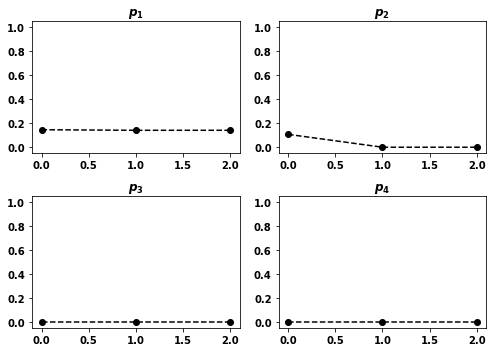

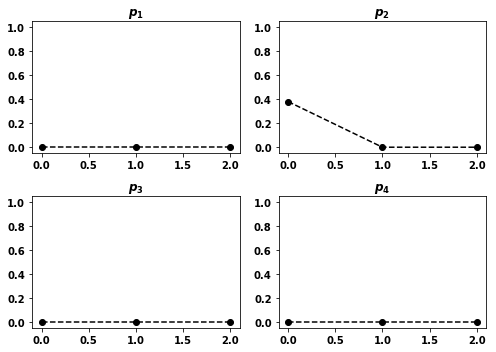

In [7]:
for j, hist in enumerate(mem_one_histories_initial):
    points = [[history[i] for history in hist] for i in range(4)]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))
    for i in range(4):
        axes = (int(i / 2), i % 2)
        ax[axes].plot(points[i], linestyle="--", marker="o", color="black"),
        ax[axes].set_title(r"$p_{}$".format(i + 1))
        ax[axes].set_ylim(-0.05, 1.05)
    fig.tight_layout()

    fig.savefig("../img/evol_initial_{}.pdf".format(j), bbox_inches="tight")
